<a href="https://colab.research.google.com/github/Radityaz/2025_ComputerVision_TI2B/blob/main/Jobsheet02_RikoAdityaZaki_TI2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#JOBSHEET 02:KLASIFIKASI GAMBAR

## Import Library

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn import svm
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import VGG16
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

## PRAKTIKUM D1-D6

### Praktikum D1 – Memulai Klasifikasi Gambar dengan Dataset Sederhana

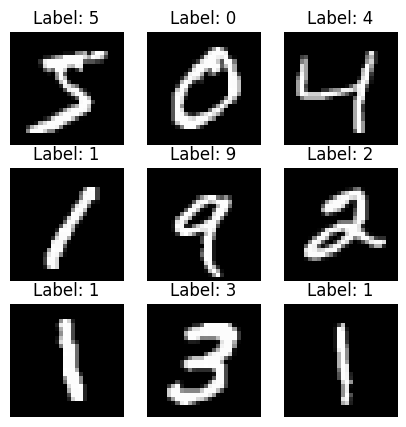

In [13]:
# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Tampilkan contoh
plt.figure(figsize=(5,5))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')
plt.show()

### Praktikum D2 – Klasifikasi Gambar dengan Model Machine Learning Tradisional

In [14]:
#Flatten
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0
# SVM
clf = svm.SVC(kernel='rbf', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000])  # gunakan subset karena SVM berat
y_pred = clf.predict(x_test_flat)
print("Akurasi:", accuracy_score(y_test, y_pred))

Akurasi: 0.9513


### Praktikum D3 – Membangun CNN Sederhana

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8992 - loss: 0.3229 - val_accuracy: 0.9818 - val_loss: 0.0613
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9833 - loss: 0.0535 - val_accuracy: 0.9883 - val_loss: 0.0378
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9890 - loss: 0.0330 - val_accuracy: 0.9903 - val_loss: 0.0344
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9928 - loss: 0.0219 - val_accuracy: 0.9898 - val_loss: 0.0352
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9941 - loss: 0.0173 - val_accuracy: 0.9877 - val_loss: 0.0439


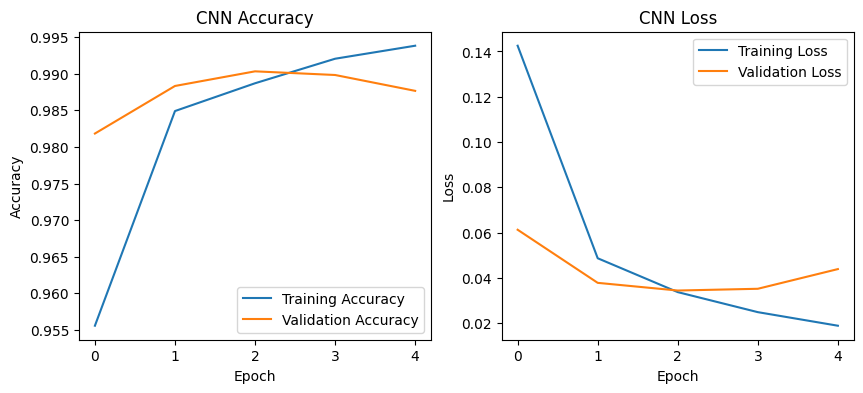

In [15]:
x_train_cnn = x_train.reshape(-1,28,28,1) / 255.0
x_test_cnn = x_test.reshape(-1,28,28,1) / 255.0
model = models.Sequential([
  layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
  layers.MaxPooling2D((2,2)),
  layers.Conv2D(64, (3,3), activation='relu'), #tugas kecil
  layers.MaxPooling2D((2,2)), #tugas kecil
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])
history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)
# ===== Plot history =====
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Praktikum D4 – Eksperimen dengan Dataset Lebih Kompleks (CIFAR-10)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.2805 - loss: 1.9279 - val_accuracy: 0.5264 - val_loss: 1.3422
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.4655 - loss: 1.4740 - val_accuracy: 0.5744 - val_loss: 1.1913
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5169 - loss: 1.3524 - val_accuracy: 0.6166 - val_loss: 1.1098
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5455 - loss: 1.2709 - val_accuracy: 0.6344 - val_loss: 1.0578
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5715 - loss: 1.1997 - val_accuracy: 0.6460 - val_loss: 1.0261
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5883 - loss: 1.1555 - val_accuracy: 0.6482 - val_loss: 0.9957
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6006 - loss: 1.1189 - val_accuracy: 0.6606 - val_loss: 0.9766
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6135 - loss: 1.084

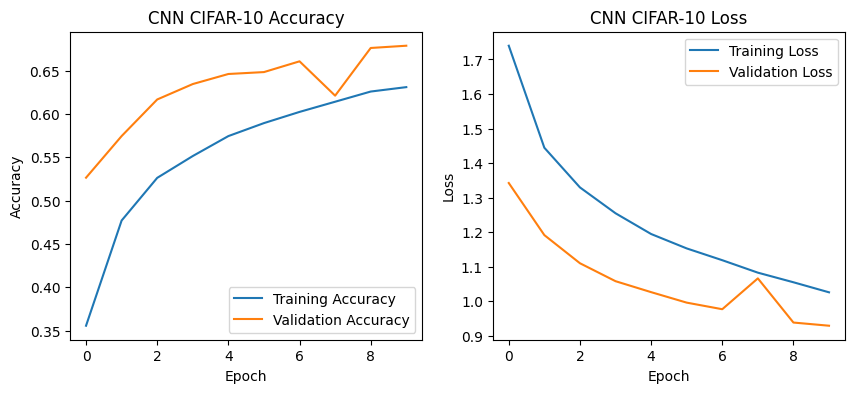

In [6]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Praktikum D5 – Transfer Learning dengan Model Pra-Latih

Layer yang dapat di-training:
input_layer_3: False
block1_conv1: False
block1_conv2: False
block1_pool: False
block2_conv1: False
block2_conv2: False
block2_pool: False
block3_conv1: False
block3_conv2: False
block3_conv3: False
block3_pool: False
block4_conv1: False
block4_conv2: False
block4_conv3: False
block4_pool: False
block5_conv1: True
block5_conv2: True
block5_conv3: True
block5_pool: True
Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.5689 - loss: 1.2130 - val_accuracy: 0.7068 - val_loss: 0.8498
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 33s 13ms/step - accuracy: 0.7357 - loss: 0.7491 - val_accuracy: 0.7408 - val_loss: 0.7505
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.7897 - loss: 0.6009 - val_accuracy: 0.7332 - val_loss: 0.7926
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.8296 - loss: 0.4771 - val_accuracy: 0.7504 - val_loss: 0.7523
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.

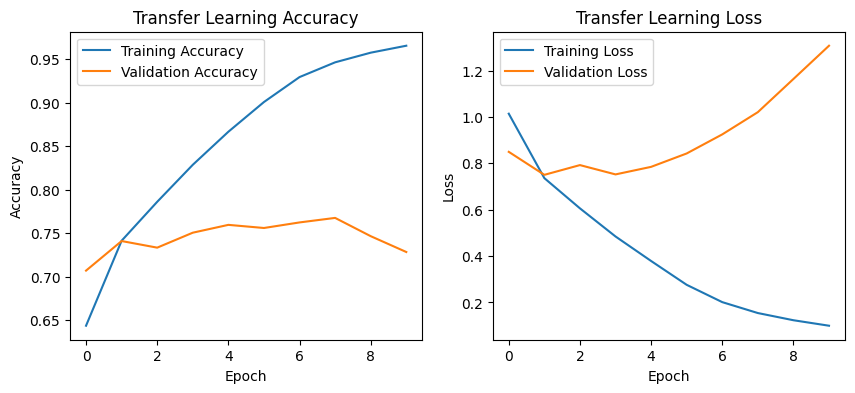

In [7]:
base_model = VGG16(weights='imagenet', include_top=False,
input_shape=(32,32,3))
base_model.trainable = False

# Aktifkan 2 layer terakhir untuk fine-tuning
for layer in base_model.layers[-4:]:  # Aktifkan 4 layer terakhir (block5)
    layer.trainable = True

# Tampikan summary untuk memverifikasi layer yang trainable
print("Layer yang dapat di-training:")
for layer in base_model.layers:
    print(f"{layer.name}: {layer.trainable}")

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Praktikum D6 – Evaluasi dengan Confusion Matrix dan Metrik Lain

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
              precision    recall  f1-score   support

           0       0.68      0.70      0.69      1000
           1       0.62      0.69      0.65      1000
           2       0.64      0.39      0.48      1000
           3       0.49      0.33      0.40      1000
           4       0.46      0.68      0.55      1000
           5       0.53      0.54      0.54      1000
           6       0.55      0.75      0.63      1000
           7       0.65      0.65      0.65      1000
           8       0.78      0.65      0.71      1000
           9       0.62      0.55      0.59      1000

    accuracy                           0.59     10000
   macro avg       0.60      0.59      0.59     10000
weighted avg       0.60      0.59      0.59     10000



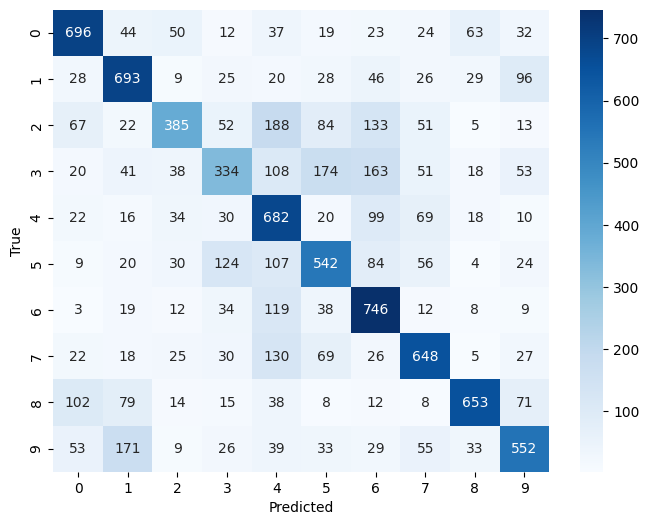

In [ ]:
y_pred = model.predict(x_test).argmax(axis=1)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## PENUGASAN

1. File upload

In [8]:
from google.colab import files
uploaded = files.upload()

Saving Angka3.jpg to Angka3.jpg
Saving Angka2.jpg to Angka2 (1).jpg
Saving Angka1.jpg to Angka1 (3).jpg


2. Preproccesing image

In [16]:
import numpy as np
from PIL import Image, ImageOps

def preprocess_to_mnist_28x28(img_pil):
    # Grayscale + autocontrast
    img = img_pil.convert('L')
    img = ImageOps.autocontrast(img)

    arr = np.array(img).astype(np.uint8)
    # Jika rata-rata terang (kertas putih), invert supaya digit menjadi putih di atas latar gelap (gaya MNIST)
    if arr.mean() > 127:
        img = ImageOps.invert(img)
        arr = np.array(img)

    # Binarisasi ringan untuk cari bbox digit
    thr = np.mean(arr) * 0.8  # ambang adaptif sederhana
    mask = arr > thr
    if mask.any():
        ys, xs = np.where(mask)
        y0, y1 = ys.min(), ys.max()
        x0, x1 = xs.min(), xs.max()
        img = img.crop((x0, y0, x1+1, y1+1))

    # Resize ke 20x20 dengan aspect ratio
    img.thumbnail((20, 20), Image.Resampling.LANCZOS)
    w, h = img.size

    # Pad ke 28x28 dan center
    canvas = Image.new('L', (28, 28), color=0)
    canvas.paste(img, ((28 - w)//2, (28 - h)//2))

    # Normalisasi ke [0,1]
    arr = np.array(canvas).astype('float32') / 255.0
    # Tambah channel dim (28,28,1) 15

    arr = arr[..., None]
    return canvas, arr

3. Prediksi CNN

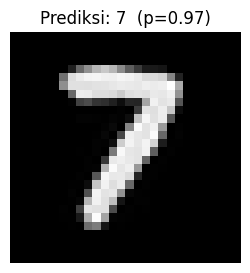

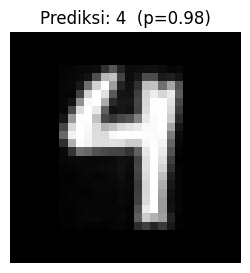

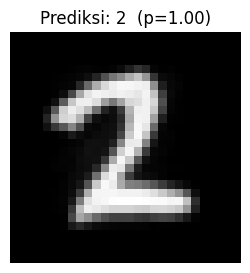

Rekap Prediksi (CNN):
- Angka3.jpg -> 7 (p=0.975)
- Angka2 (1).jpg -> 4 (p=0.976)
- Angka1 (3).jpg -> 2 (p=1.000)


In [17]:
import matplotlib.pyplot as plt

results = []
for fname in uploaded.keys():
    img_pil = Image.open(fname)
    disp, x = preprocess_to_mnist_28x28(img_pil)   # disp: PIL untuk ditampilkan, x: (28,28,1)
    x_batch = np.expand_dims(x, axis=0)            # (1,28,28,1)
    probs = model.predict(x_batch, verbose=0)[0]   # shape (10,)
    pred = int(np.argmax(probs))
    conf = float(np.max(probs))

    results.append((fname, pred, conf))

    # Tampilkan hasil
    plt.figure(figsize=(3,3))
    plt.imshow(disp, cmap='gray')
    plt.title(f"Prediksi: {pred}  (p={conf:.2f})")
    plt.axis('off')
    plt.show()

# Rekap ringkas
print("Rekap Prediksi (CNN):")
for r in results:
    print(f"- {r[0]} -> {r[1]} (p={r[2]:.3f})")